In [4]:
from pathlib import Path
import os
import matplotlib.pyplot as plt
from fastcore.utils import *
from PIL import Image
from skimage import io

import solaris as sol
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
data_dir = Path('/media/wwymak/Storage/spacenet/AOI_3_Paris_Train')

In [10]:
data_dir.ls()

(#6) [Path('/media/wwymak/Storage/spacenet/AOI_3_Paris_Train/RGB-PanSharpen'),Path('/media/wwymak/Storage/spacenet/AOI_3_Paris_Train/MUL-PanSharpen'),Path('/media/wwymak/Storage/spacenet/AOI_3_Paris_Train/MUL'),Path('/media/wwymak/Storage/spacenet/AOI_3_Paris_Train/summaryData'),Path('/media/wwymak/Storage/spacenet/AOI_3_Paris_Train/PAN'),Path('/media/wwymak/Storage/spacenet/AOI_3_Paris_Train/geojson')]

In [6]:
# img = Image.open((data_dir/'RGB-PanSharpen').ls()[10])
(data_dir/'RGB-PanSharpen').ls()[10]

Path('/media/wwymak/Storage/spacenet/AOI_3_Paris_Train/RGB-PanSharpen/RGB-PanSharpen_AOI_3_Paris_img1371.tif')

In [10]:
(data_dir/'geojson/buildings').ls()[0]

Path('/media/wwymak/Storage/spacenet/AOI_3_Paris_Train/geojson/buildings/buildings_AOI_3_Paris_img1776.geojson')

In [16]:
io.use_plugin('tifffile')
img = io.imread('/media/wwymak/Storage/spacenet/AOI_3_Paris_Train/RGB-PanSharpen/RGB-PanSharpen_AOI_3_Paris_img1371.tif')
img.max(), img.min()

(1713, 7)

In [17]:
img.shape

(650, 650, 3)

In [18]:
len((data_dir/'RGB-PanSharpen').ls())

1148

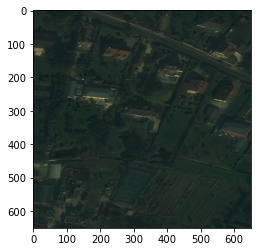

In [19]:
plt.imshow((img- img.min())/ (img.max()- img.min()))

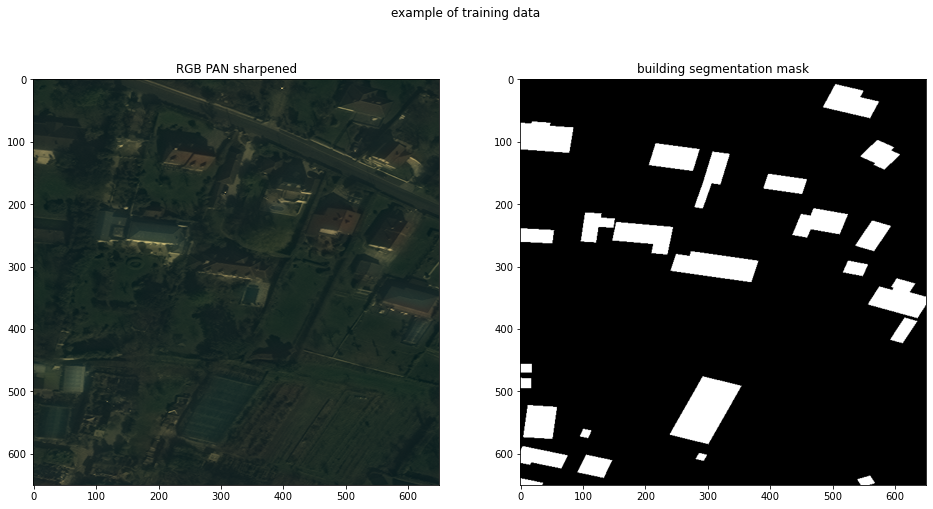

In [23]:
fp_mask = sol.vector.mask.footprint_mask(df='/media/wwymak/Storage/spacenet/AOI_3_Paris_Train/geojson/buildings/buildings_AOI_3_Paris_img1371.geojson',
                                      reference_im='/media/wwymak/Storage/spacenet/AOI_3_Paris_Train/RGB-PanSharpen/RGB-PanSharpen_AOI_3_Paris_img1371.tif')
f, ax = plt.subplots(1,2,figsize=(16, 8))
ax[ 1].imshow(fp_mask, cmap='gray')
ax[0].imshow((img- img.min())/ (img.max()- img.min()));
ax[0].set_title('RGB PAN sharpened')
ax[1].set_title('building segmentation mask')
plt.suptitle('example of training data')
plt.savefig('example_dataset.jpg')